# Fraud Detection in Retail Transaction Data

## In this Project:

1. **Exploratory Data Analysis (EDA) on Retail Transaction Datasets**
   - The first step is to conduct a thorough Exploratory Data Analysis (EDA) on the given retail transaction datasets.
   - This will involve analyzing transaction patterns, identifying key features, understanding the distribution of the data, and checking for any missing or anomalous values.

2. **Building an Autoencoder Model**
   - An **Autoencoder neural network** will be built to detect fraudulent transactions.
   - This model will be trained using normal (non-fraudulent) transactions, learning to capture the typical patterns in the data.
   - The **encoder** will map the input data to a lower-dimensional representation, while the **decoder** will reconstruct the original transaction.
   - The model will be trained to minimize the difference between the original input and the reconstructed transaction (reconstruction error).

3. **Evaluation and Testing of the Model for Classification of Fraudulent Transactions**
   - Once the Autoencoder is trained on normal transactions, it will be tested on a mix of normal and fraudulent transactions.
   - **Evaluation** will be based on the reconstruction error: fraudulent transactions, which deviate from the learned normal patterns, are expected to have higher reconstruction errors.
   - By setting an appropriate **threshold** for the reconstruction error, the model will classify transactions as either normal or fraudulent.
   - The model's performance will be measured using metrics like **precision**, **recall**, and **F1-score**.

# Anomaly Detection with Autoencoder

Anomaly detection is a machine learning technique used to identify patterns in data that deviate from expected behavior. These unusual patterns, known as anomalies or outliers, may signal errors, fraud, or significant phenomena that require further investigation. Anomaly detection finds applications in various domains, including finance, cybersecurity, medical diagnosis, and predictive maintenance.

There are numerous methods available for detecting anomalies, ranging from statistical approaches to clustering algorithms and deep learning models. Common techniques include:

- **Principal Component Analysis (PCA)**
- **K-Nearest Neighbors (KNN)**
- **Isolation Forest**
- **Ensemble Methods**

In the deep learning domain, **Autoencoders** are a popular approach for anomaly detection. Autoencoders are neural networks that learn to encode and decode data. By training them on normal (non-anomalous) data, they can identify anomalies in new data that doesn't conform to learned patterns.

Evaluating anomaly detection models can be particularly challenging because anomalies are rare and may be poorly represented in the training data. Metrics like **precision**, **recall**, and **F1-score** are commonly used to assess performance. **Cross-validation** is often applied to estimate how well the model will perform on unseen data.

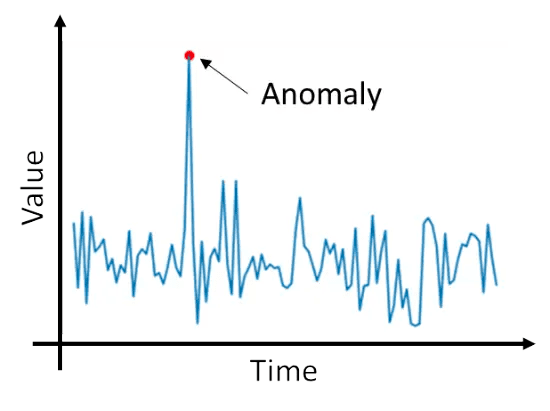
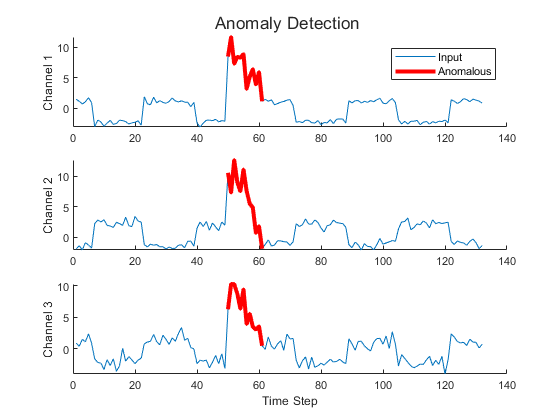

---

### Anomaly Detection Applications
Anomaly detection is a powerful tool for uncovering unexpected patterns, offering valuable insights across many fields. However, it's essential to understand the limitations of each method and thoroughly evaluate the model's performance on real-world data.


# Autoencoders

Autoencoders are a type of neural network used for unsupervised learning, dimensionality reduction, and data compression. The primary objective of an autoencoder is to learn a compact representation of input data by encoding it into a lower-dimensional form, and then decoding it back to reconstruct the original input.

### Autoencoder Structure

An autoencoder consists of three main components:

1. **Encoder**: Maps the input data into a lower-dimensional representation.
2. **Hidden Layer (Code)**: This is the compressed representation or the "code" that captures the essential information from the input data.
3. **Decoder**: Maps the lower-dimensional representation back to the original input, attempting to reconstruct it as accurately as possible.

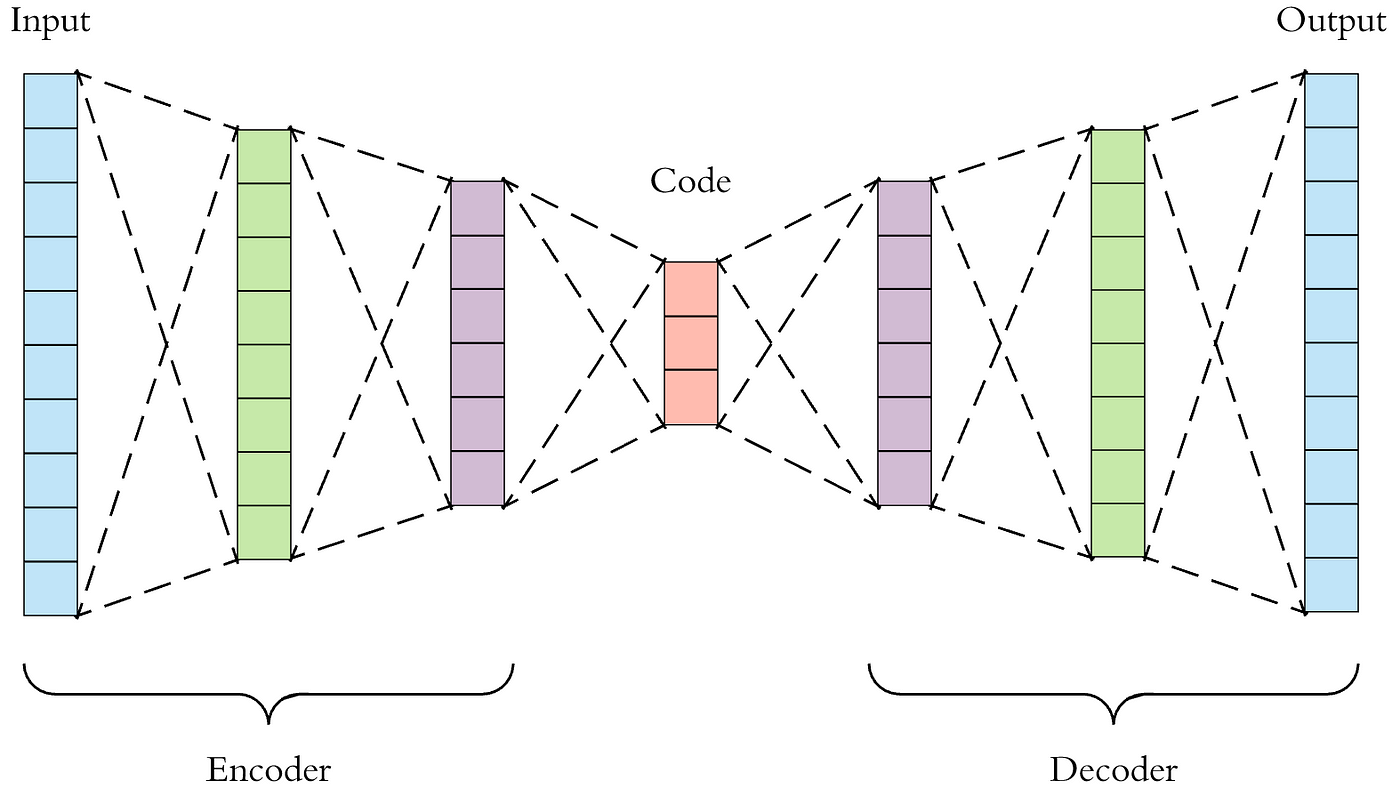

During training, the autoencoder learns to minimize the reconstruction error, which is the difference between the original input and the reconstructed output. This process encourages the network to develop an efficient and compressed representation of the input data. One of the key strengths of autoencoders is their ability to capture complex, non-linear relationships between features in the data.

---

### Applications of Autoencoders

Autoencoders can be applied in a variety of fields, such as:
- **Image compression**
- **Anomaly detection**
- **Data denoising**
- **Generating new data**

---

### Autoencoders for Anomaly Detection

When used for anomaly detection, the goal of an autoencoder is to learn a compressed representation of the normal data. This compressed representation captures the typical patterns and relationships found in the data. Anomalies, which deviate from these patterns, are identified when their reconstruction error exceeds a certain threshold.

#### How It Works:
1. **Training on Normal Data**: The autoencoder is trained using only normal data, ensuring that it learns the common structure and patterns.
2. **Reconstruction Error**: After training, the autoencoder can process new data points, encoding and reconstructing them. The difference between the input and reconstructed output is measured as the reconstruction error.
3. **Anomaly Detection**: If the reconstruction error for a new data point is higher than a predefined threshold, it is considered an anomaly. This method allows for the identification of anomalies without the need to explicitly label them during training.

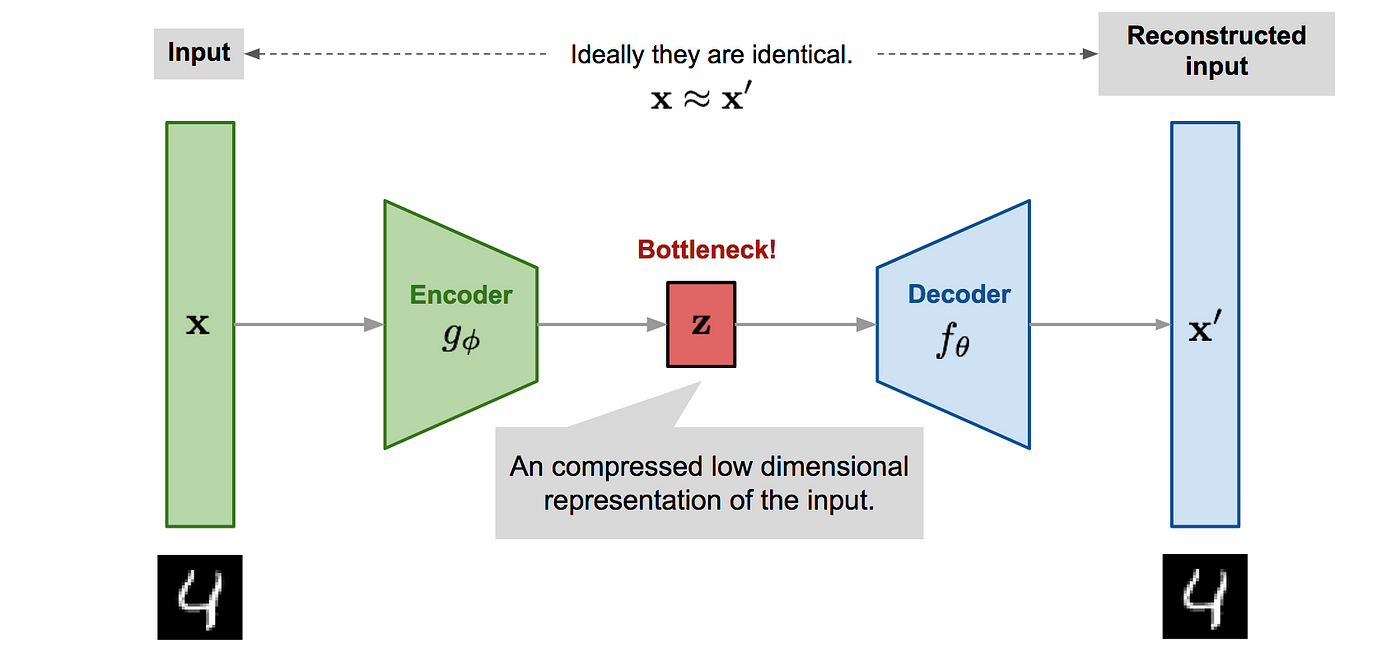

By leveraging the autoencoder’s ability to learn patterns from normal data, this technique provides an efficient way to detect anomalies in new, unseen data.


In this Project:
EDA on Retail Transaction Datasets
Building an Autoencoder model
Evaluation and Testing of model for Classification of Fraud transacations

# Environment Setup

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['font.size'] = 10

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mae
from tensorflow.keras.metrics import Mean
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


# Loading Dataset

In [3]:
df = pd.read_csv('/kaggle/input/card-transdata1/card_transdata.csv')
df.head()
#/kaggle/input/card-transdata1

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


# Shape of Dataset

In [5]:
print(f"Columns: {df.shape[1]}\nSamples: {df.shape[0]}")

Columns: 8
Samples: 1000000


# Checking for Null Values

In [6]:
any(df.isna().sum() > 0)

False

# Basic Statistics

In [7]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
cat_feats = [x for x in df.columns if len(df[x].unique()) <=2]
num_feats = [x for x in df.columns if x not in cat_feats]

# Exploratory Data Analysis (EDA)

In [8]:
df['fraud'].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

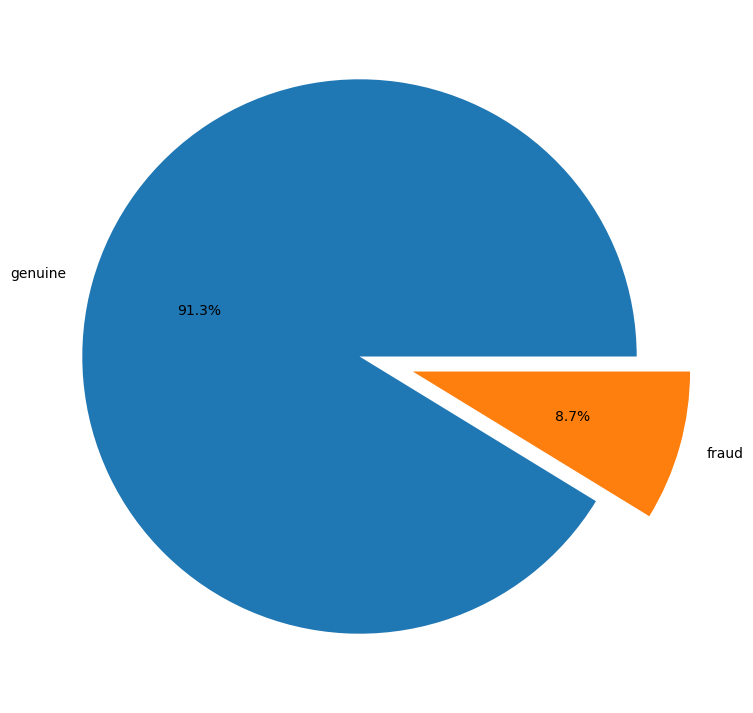

In [9]:
vc = df['fraud'].value_counts(ascending=False)

plt.pie(x=vc.values, labels=['genuine','fraud'], explode=[0.0, 0.2], autopct='%1.1f%%')
plt.show()

# Inferences

1. **The Dataset is Heavily Imbalanced**:
   - A significant observation from the **Exploratory Data Analysis (EDA)** is that the dataset contains a disproportionate number of genuine transactions compared to fraudulent ones.
   - This imbalance poses challenges in model training and evaluation, as traditional classifiers might become biased toward the majority class (genuine transactions).
   - The autoencoder approach is particularly well-suited for such imbalanced datasets.

2. **Autoencoders Require Only Genuine Samples for Training**:
   - Since autoencoders are trained to reconstruct normal transaction patterns, they only require instances of **genuine (non-fraudulent) transactions** during the training phase.
   - By learning the normal patterns, the model can detect anomalies (fraudulent transactions) based on deviations from these patterns.
   - This eliminates the need for labeled fraudulent samples in the training set.

3. **Fraud Samples Will Be Used Exclusively for Testing**:
   - The fraudulent samples will be held back for **testing** and model evaluation.
   - During testing, the model will be applied to a combination of genuine and fraudulent transactions, using the **reconstruction error** to classify each transaction.
   - Fraudulent transactions are expected to produce higher reconstruction errors due to their deviation from the learned normal transaction patterns.


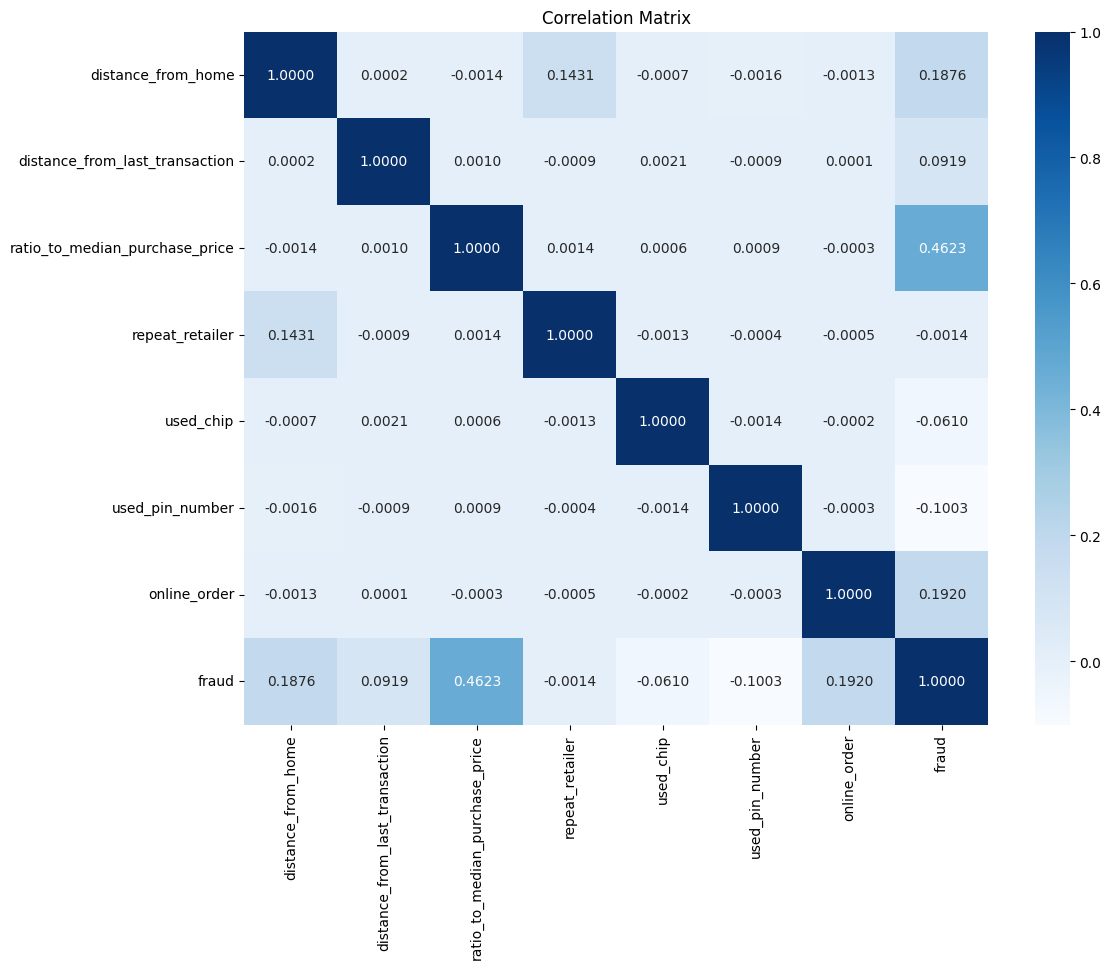

In [10]:
sns.heatmap(df.corr(), annot=True, fmt='.4f', cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

### Inferences

1. **Weak Correlation Among Features**: 
   - Most correlation values in the dataset are **very close to 0**, suggesting that the features are **weakly correlated**. This indicates that the individual features do not provide strong predictive power on their own, which can complicate traditional modeling approaches.

2. **Limitations of PCA**: 
   - Principal Component Analysis (PCA) relies on the assumption of **linearity** in the data. Consequently, it may not effectively capture the underlying structure of datasets that exhibit **non-linear relationships** among features, which is common in complex data distributions.

3. **Advantages of Autoencoders**: 
   - Autoencoders address the limitations of PCA by effectively modeling **non-linear relationships**. They can learn complex patterns in the data, making them particularly valuable for tasks like anomaly detection, where understanding intricate interactions among features is crucial. By capturing these relationships, Autoencoders provide a more robust representation of the data, leading to improved performance in identifying anomalies.


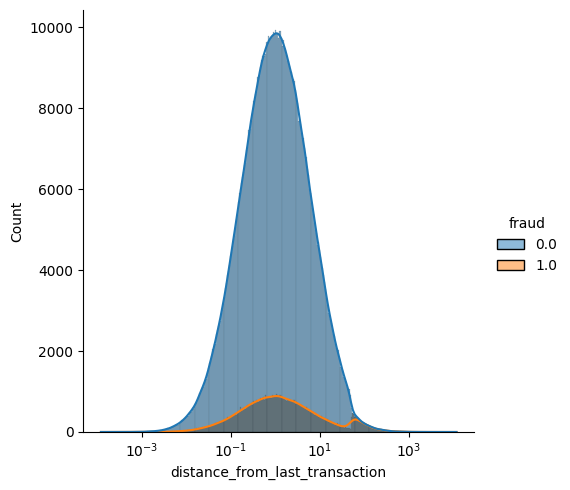

In [11]:
sns.displot(data=df, x='distance_from_last_transaction', hue='fraud', log_scale=True, kde=True)
plt.show()

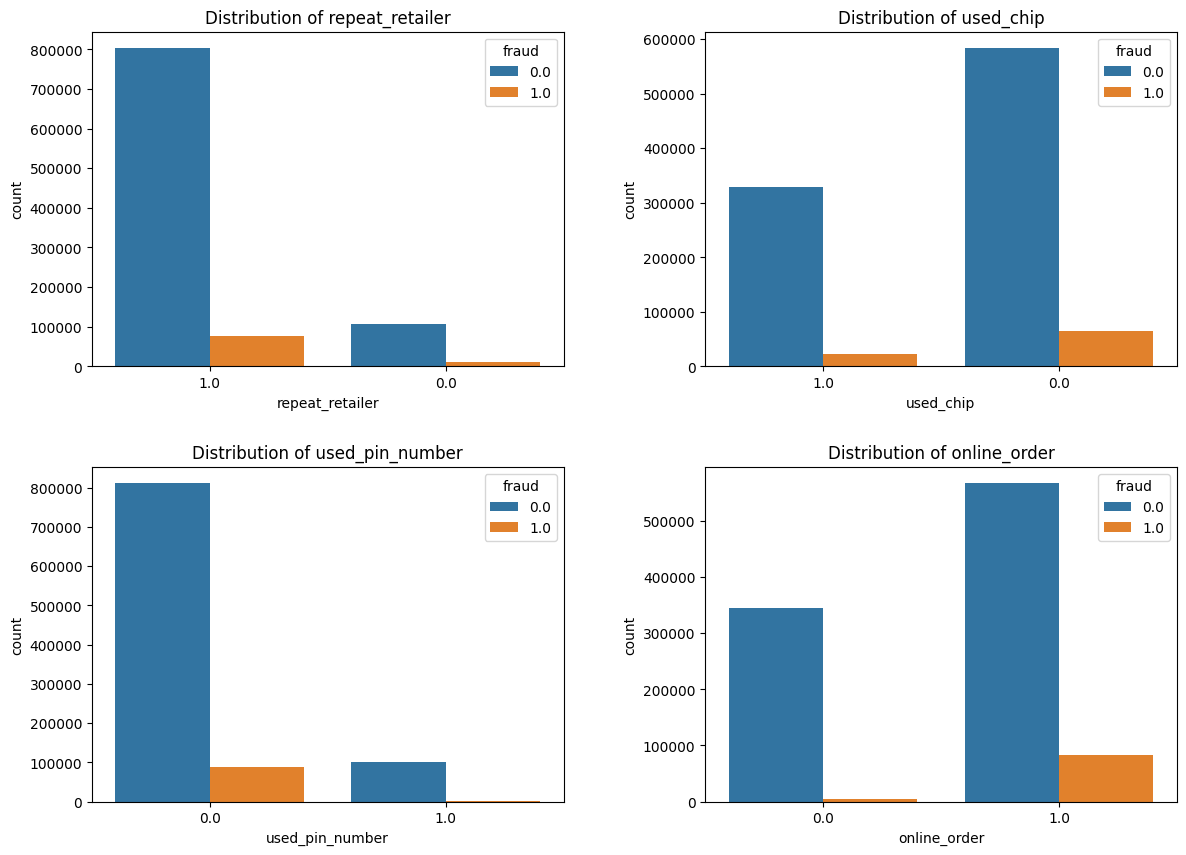

In [13]:
feats_to_plot = df.columns[3:-1]
plt.figure(figsize=(14,10))
for i, col in enumerate(feats_to_plot):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[col].astype(str), hue=df['fraud'])
    plt.title(f'Distribution of {col}')
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

# Feature Engineering

In [14]:
ct = make_column_transformer(
    (StandardScaler(), num_feats)
)

df_scaled = pd.DataFrame(ct.fit_transform(df), columns=num_feats)
df_cat_feats = df[cat_feats]

df_concat = pd.concat([df_scaled, df_cat_feats], axis=1)
df_concat.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.477882,-0.182849,0.043491,1.0,1.0,0.0,0.0,0.0
1,-0.241607,-0.188094,-0.189300,1.0,0.0,0.0,0.0,0.0
2,-0.329369,-0.163733,-0.498812,1.0,0.0,0.0,1.0,0.0
3,-0.372854,0.021806,-0.522048,1.0,1.0,0.0,1.0,0.0
4,0.268572,-0.172968,0.142373,1.0,1.0,0.0,1.0,0.0


### Anomaly Detection with Genuine Class Data

For anomaly detection, the primary focus is on the **genuine class** of the data. This approach is vital for several reasons:

1. **Training on Normal Data**:
   - The model is designed to learn and fit exclusively on **normal (genuine) data**. By doing this, we ensure that the Autoencoder captures the underlying patterns and features of the normal class, enabling it to effectively reconstruct inputs that conform to these patterns.

2. **Reconstruction Error**:
   - When the model encounters an abnormal input, it is expected to produce a **higher reconstruction error** compared to a normal input. This is because the model has not been trained on abnormal data, leading to significant deviations in the reconstructed output for anomalies.

3. **Testing with Both Classes**:
   - For the evaluation of the model's performance, samples from **both the genuine and fraudulent classes** will be utilized. This enables us to assess the model's ability to correctly identify anomalies and its effectiveness in distinguishing between normal and abnormal inputs.


In [15]:
X = df_concat.drop(['fraud'], axis=1)
y = df_concat['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

y_train = y_train.astype(bool)
y_test = y_test.astype(bool)

X_train_genuine = X_train[~y_train]
X_test_genuine = X_test[~y_test]

X_train_fraud = X_train[y_train]
X_test_fraud = X_test[y_test]

# Model Building - Autoencoder

## Architecture

The architecture of an Autoencoder consists of two main components: the **encoder** and the **decoder**.

1. **Encoder**:
   - The encoder is designed to transform the input data into a lower-dimensional representation. This typically involves one or more fully connected layers.
   - The number of nodes in the hidden layer is usually smaller than the number of nodes in both the input and output layers. This structure compels the network to learn a compressed representation of the input data.
   - The activation function used in the encoder can be any non-linear function, such as:
     - **Sigmoid**
     - **Rectified Linear Unit (ReLU)**
   - These non-linear activation functions enable the network to capture complex, non-linear relationships in the input data.

2. **Decoder**:
   - The decoder is essentially a mirror image of the encoder. It consists of one or more fully connected layers that transform the compressed representation back into the original input space.
   - The output layer of the decoder must have the same number of nodes as the input layer to allow the decoder to produce a reconstruction of the input data.
   - The activation function used in the decoder is typically the same as that used in the encoder to maintain consistency in the transformation process.


In [18]:
CODE_DIM = 2
INPUT_SHAPE = X_train.shape[1]

input_layer = Input(shape=(INPUT_SHAPE,))
x = Dense(64, activation='relu')(input_layer)
x = Dense(16, activation='relu')(x)
code = Dense(CODE_DIM, activation='relu')(x)
x = Dense(16, activation='relu')(code)
x = Dense(64, activation='relu')(x)
output_layer = Dense(INPUT_SHAPE, activation='relu')(x)

autoencoder = Model(input_layer, output_layer, name='anomaly')

# Model Callbacks

In this section, we define two important callbacks for training our Autoencoder model: `ModelCheckpoint` and `EarlyStopping`. The `ModelCheckpoint` callback saves the model weights to a file named "anomaly.h5" whenever the validation loss improves, ensuring we retain the best model during training. The `EarlyStopping` callback monitors the validation loss and halts training if there’s no improvement for 5 consecutive epochs, preventing overfitting. Both callbacks are combined into a list named `callbacks`, which will be used during the model training process.


In [24]:
model_name = "anomaly.weights.h5"  # Use .weights.h5 extension
checkpoint = ModelCheckpoint(model_name,
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             save_weights_only=True,
                             verbose=1)

earlystopping = EarlyStopping(monitor='val_loss',
                              min_delta=0, 
                              patience=5, 
                              verbose=1,
                              restore_best_weights=True)

callbacks = [checkpoint, earlystopping]


# Compilation

In [25]:
autoencoder.compile(loss='mae',
                    optimizer=Adam())

# Training

In [26]:
history = autoencoder.fit(X_train_genuine, X_train_genuine,
                          epochs=25, batch_size=64,
                          validation_data=(X_test, X_test),
                          callbacks=callbacks, shuffle=True)

Epoch 1/25
11404/11408 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1838
Epoch 1: val_loss improved from inf to 0.18710, saving model to anomaly.weights.h5
11408/11408 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 0.1838 - val_loss: 0.1871
Epoch 2/25
11385/11408 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1638
Epoch 2: val_loss did not improve from 0.18710
11408/11408 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 0.1638 - val_loss: 0.1874
Epoch 3/25
11404/11408 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1633
Epoch 3: val_loss did not improve from 0.18710
11408/11408 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 0.1633 - val_loss: 0.1878
Epoch 4/25
11402/11408 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1634
Epoch 4: val_loss improved from 0.18710 to 0.18708, saving model to anomaly.weights.h5
11408/11408 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 0.1634 - val_loss: 0.1871
Epoch 5/25
11383/11408 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1630
Epoch 5: val_loss improved from 0.18708 to 0.18684, saving mo

# Results

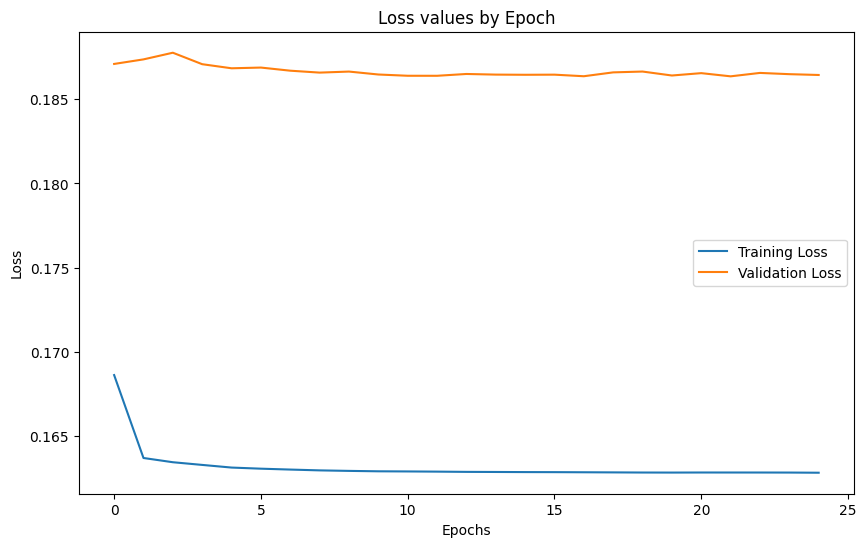

In [27]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss values by Epoch")
plt.show()

# Reconstruction

Reconstruction refers to the process of utilizing the learned compressed representation of the input data to generate a reconstruction of the original input. This reconstruction is accomplished by passing the compressed representation through the decoder portion of the autoencoder. The primary objective of the autoencoder is to learn a compressed representation of the input data that can effectively be used to generate accurate reconstructions of the original input.

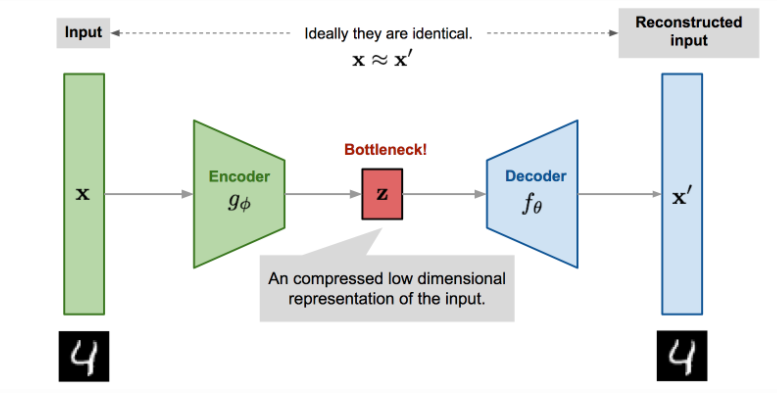

Here, the reconstruction error is represented as \( x - x' \), where \( x \) denotes the original input and \( x' \) signifies the reconstructed output.

We will begin by making predictions on the test set, which consists of samples from both classes (genuine and fraudulent). After obtaining these predictions, we can define a threshold and a metric based on our requirements. The classification logic is straightforward:

- If the reconstruction error is lower than the threshold, the sample is classified as genuine.
- If the reconstruction error is higher than the threshold, the sample is classified as fraud.

This approach is effective because the model was trained exclusively with genuine class samples; therefore, any input that produces a reconstruction error exceeding the threshold is deemed an anomaly.


In [28]:
reconstructions = autoencoder.predict(X_test, verbose=0)
reconstruction_error = mae(reconstructions, X_test)

# Create Dataframe with reconstruction error and true labels

In [29]:
recons_df = pd.DataFrame({
    'error': reconstruction_error,
    'y_true': y_test
}).reset_index(drop=True)
recons_df.head()

,error,y_true
0,0.115380,False
1,0.060508,False
2,0.302313,True
3,0.105622,False
4,0.148720,False


# Finding the Ideal Threshold

Choosing the appropriate threshold is critical in anomaly detection using autoencoders, as it directly affects the balance between identifying anomalies and minimizing false positives. The threshold sets the cutoff point for the reconstruction error; any data point with a reconstruction error exceeding this threshold is classified as anomalous. 

If the threshold is set too low, the autoencoder may incorrectly classify many normal data points as anomalies, leading to a high false positive rate. Conversely, if the threshold is set too high, some true anomalies may go undetected, resulting in a high false negative rate.

For this project, the primary metric we will focus on is Recall, as our objective is to minimize false negatives. Classifying any fraudulent transaction as genuine could result in overlooked issues within the system, as it would mean no anomalies are detected. To determine the optimal threshold, we will test several potential values to identify the best combination of Recall and accuracy metrics. The values tested will be based on percentiles of the reconstruction error values, enabling us to find a threshold that effectively balances detection rates.


In [30]:
def thresholdTuning(df, iterations):
    
    thresh_df = {
        'threshold': [],
        'accuracy': [],
        'precision': [],
        'recall': []
    }
    
    for i in range(iterations):
        thresh_value = df['error'].quantile(i/iterations)
        preds = df['error'] > thresh_value
        cr = classification_report(df['y_true'], preds, output_dict=True)
        acc = cr['accuracy']
        prec = cr['macro avg']['precision']
        rc = cr['macro avg']['recall']
        
        thresh_df['threshold'].append(thresh_value)
        thresh_df['accuracy'].append(acc)
        thresh_df['precision'].append(prec)
        thresh_df['recall'].append(rc)
        
        print(f"Threshold: {thresh_value:.4f}\tAccuracy: {acc:.3f}\t\tPrecision: {prec:.3f}\tRecall Score: {rc:.3f}")
        
    return pd.DataFrame(thresh_df)
        
thresh_df = thresholdTuning(recons_df, 10)

Threshold: 0.0037	Accuracy: 0.087		Precision: 0.544	Recall Score: 0.500
Threshold: 0.0763	Accuracy: 0.187		Precision: 0.549	Recall Score: 0.555
Threshold: 0.0936	Accuracy: 0.287		Precision: 0.555	Recall Score: 0.610
Threshold: 0.1078	Accuracy: 0.387		Precision: 0.562	Recall Score: 0.664
Threshold: 0.1206	Accuracy: 0.487		Precision: 0.573	Recall Score: 0.719
Threshold: 0.1334	Accuracy: 0.587		Precision: 0.587	Recall Score: 0.773
Threshold: 0.1473	Accuracy: 0.686		Precision: 0.608	Recall Score: 0.826
Threshold: 0.1708	Accuracy: 0.782		Precision: 0.639	Recall Score: 0.867
Threshold: 0.2391	Accuracy: 0.845		Precision: 0.651	Recall Score: 0.804
Threshold: 0.3196	Accuracy: 0.905		Precision: 0.707	Recall Score: 0.733


In [31]:
threshold = thresh_df[thresh_df['recall'] == thresh_df['recall'].max()]['threshold'].values[0]
print(f"Threshold with Maximum Recall: {threshold:.6f}")

Threshold with Maximum Recall: 0.170836


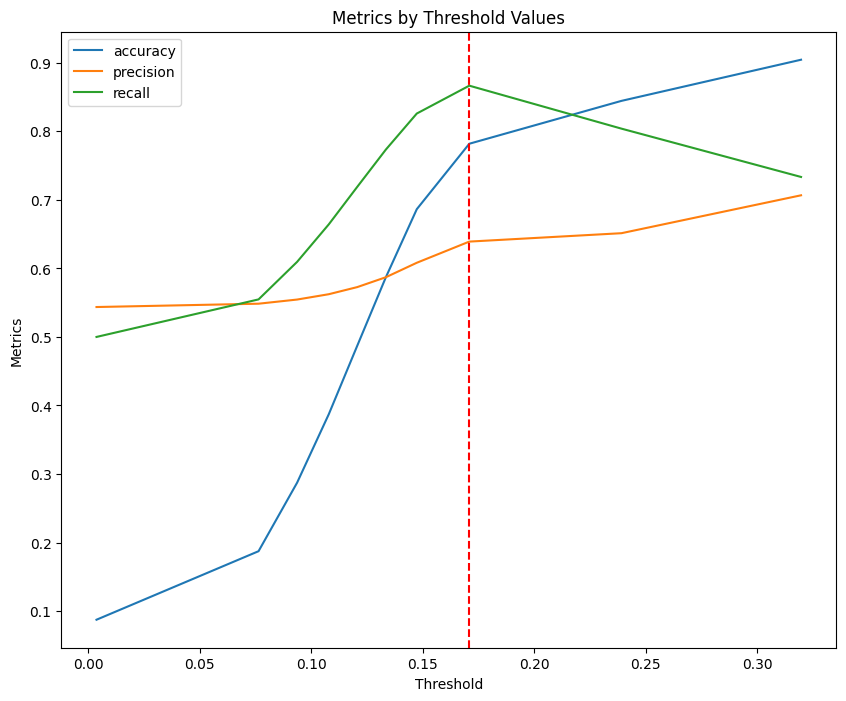

In [32]:
plt.figure(figsize=(10,8))
plt.plot(thresh_df['threshold'], thresh_df['accuracy'], label='accuracy')
plt.plot(thresh_df['threshold'], thresh_df['precision'], label='precision')
plt.plot(thresh_df['threshold'], thresh_df['recall'], label='recall')
plt.axvline(x=threshold, color='r', linestyle='dashed')
plt.xlabel('Threshold')
plt.ylabel('Metrics')
plt.title('Metrics by Threshold Values')
plt.legend()
plt.show()

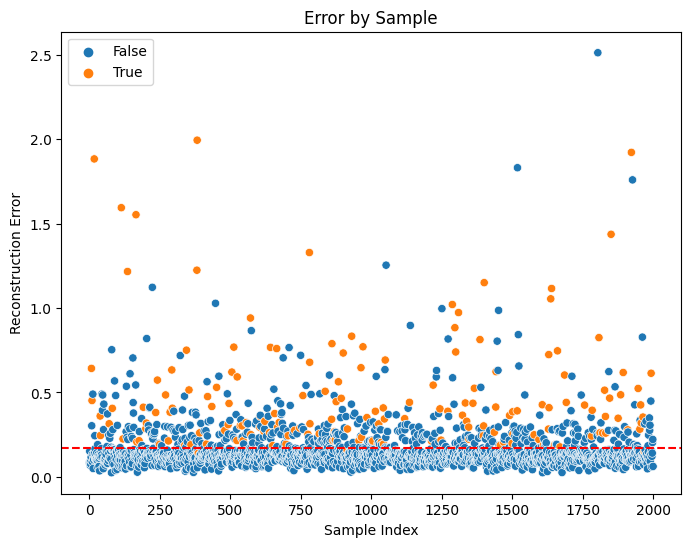

In [33]:
temp = recons_df.sample(frac=0.01, random_state=42).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.scatterplot(data=temp, x=temp.index, y='error', hue='y_true')
plt.axhline(y=threshold, color='r', linestyle='dashed')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.title('Error by Sample')
plt.legend()
plt.show()

In the plot, the red dashed line signifies the threshold for reconstruction error. To enhance clarity, only 1% of the testing data is displayed.

- **Genuine Transactions**: Most of the blue markers, representing genuine transactions, are clustered below the threshold, indicating that they are accurately reconstructed by the autoencoder.
  
- **Fraud Transactions**: Above the threshold, an increasing number of orange markers emerge, representing fraud transactions. This pattern illustrates the model's ability to identify anomalies effectively, as these transactions exhibit higher reconstruction errors.

# Classification

In [34]:
recons_df['y_pred'] = recons_df['error'] > threshold
recons_df.head()

,error,y_true,y_pred
0,0.115380,False,False
1,0.060508,False,False
2,0.302313,True,True
3,0.105622,False,False
4,0.148720,False,False


In [35]:
print(classification_report(recons_df['y_true'],recons_df['y_pred']))

              precision    recall  f1-score   support

       False       1.00      0.76      0.86    182538
        True       0.28      0.97      0.44     17462

    accuracy                           0.78    200000
   macro avg       0.64      0.87      0.65    200000
weighted avg       0.93      0.78      0.83    200000



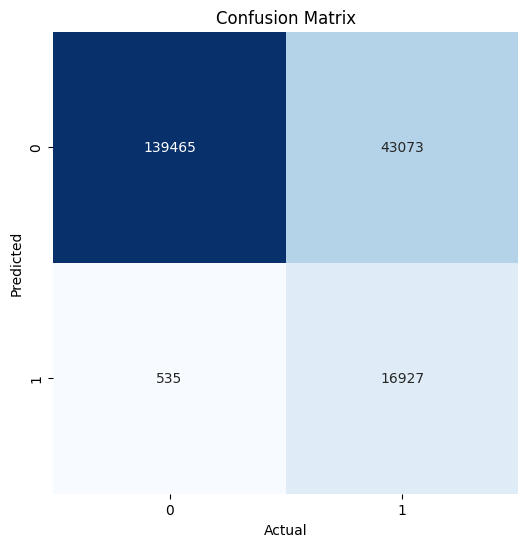

In [36]:
cm = confusion_matrix(recons_df['y_true'],recons_df['y_pred'])
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, fmt='.6g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Results

In [37]:
print(f"Recall Score: {recall_score(recons_df['y_true'],recons_df['y_pred'])*100:.3f}%")
print(f"Accuracy Score: {accuracy_score(recons_df['y_true'],recons_df['y_pred'])*100:.3f}%")

Recall Score: 96.936%
Accuracy Score: 78.196%
